# **Práctica 9: Pronóstico (Precio de las acciones)**

Nombre: Castillo Montes Pamela

No. Cuenta: 317165935

Email: pamela.castilo.montes@gmail.com

### **Contexto**

Yahoo Finance ofrece una amplia variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También proporciona informes de noticias con varios puntos de vista sobre diferentes mercados de todo el mundo, todos accesibles a través de la biblioteca yfinance.

**Objetivo:** Generar un modelo de pronóstico de las acciones de una determinada empresa a través de un algoritmo de aprendizaje automático.

**Fuente de datos**

De Yahoo Finanzas se utiliza el Ticker -Etiqueta de cotización- de la acción bursatil.

### **Importar las bibliotecas y los datos**

In [1]:
!pip install yfinance
#!pip install googlefinance

Found existing installation: yfinance 0.1.87
Uninstalling yfinance-0.1.87:
  Successfully uninstalled yfinance-0.1.87
  Using cached yfinance-0.1.87-py2.py3-none-any.whl (29 kB)


In [2]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline             
import yfinance as yf

In [3]:
# Para Fibra 1
DataFuno = yf.Ticker('FUNO11.MX')

In [4]:
#Error timezone
yf.set_tz_cache_location("custom/cache/location")

FunoHist = DataFuno.history(start = '2019-1-1', end = '2022-11-20', interval = '1d')
FunoHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-06:00,15.692252,16.555181,15.626989,16.439157,1928502,0.0,0
2019-01-03 00:00:00-06:00,16.460913,16.968517,16.214362,16.903254,2436398,0.0,0
2019-01-04 00:00:00-06:00,16.939510,17.026527,16.323132,16.547928,4363680,0.0,0
2019-01-07 00:00:00-06:00,16.656703,17.352848,16.323134,17.120800,8307194,0.0,0
2019-01-08 00:00:00-06:00,17.193318,17.476128,17.019282,17.360104,3749804,0.0,0
...,...,...,...,...,...,...,...
2022-11-14 00:00:00-06:00,24.340000,24.340000,23.850000,24.000000,6055649,0.0,0
2022-11-15 00:00:00-06:00,24.059999,24.299999,23.870001,24.150000,4031749,0.0,0
2022-11-16 00:00:00-06:00,24.180000,24.200001,23.510000,23.740000,5932576,0.0,0


Descripción:

* En el comercio de acciones, 'alto' y 'bajo' se refieren a los precios máximos y mínimos en un período determinado.
* 'Apertura' y 'cierre' son los precios en los que una acción comenzó y terminó cotizando en el mismo período. 
* El 'volumen' es la cantidad total de la actividad comercial. 
* Los valores ajustados tienen en cuenta las acciones corporativas, como los 'dividendos', la 'división de acciones' y la emisión de nuevas acciones.

### **Descripción de la estructura de los datos**

Se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos. Se observa que los datos son numéricos (flotante y entero).

In [5]:
FunoHist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 980 entries, 2019-01-02 00:00:00-06:00 to 2022-11-18 00:00:00-06:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          980 non-null    float64
 1   High          980 non-null    float64
 2   Low           980 non-null    float64
 3   Close         980 non-null    float64
 4   Volume        980 non-null    int64  
 5   Dividends     980 non-null    float64
 6   Stock Splits  980 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 61.2 KB


In [6]:
FunoHist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,980.000000,980.000000,980.000000,980.000000,9.800000e+02,980.000000,980.0
mean,19.437735,19.721442,19.108656,19.418290,7.628752e+06,0.007592,0.0
std,2.726558,2.739143,2.727908,2.737746,6.358701e+06,0.061185,0.0
min,12.651586,13.469876,12.329048,12.651587,0.000000e+00,0.000000,0.0
25%,18.413802,18.710936,18.053957,18.399201,3.995948e+06,0.000000,0.0
50%,19.578630,19.900014,19.285755,19.579906,6.061683e+06,0.000000,0.0
75%,20.917720,21.204161,20.580071,20.907454,9.216816e+06,0.000000,0.0
max,25.998592,26.109398,25.484162,25.935282,9.934528e+07,0.682855,0.0


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores nulos o vacios. Estos son: **Dividends** y **Stock Splits**.

### **Gráfica de los precios de las acciones**

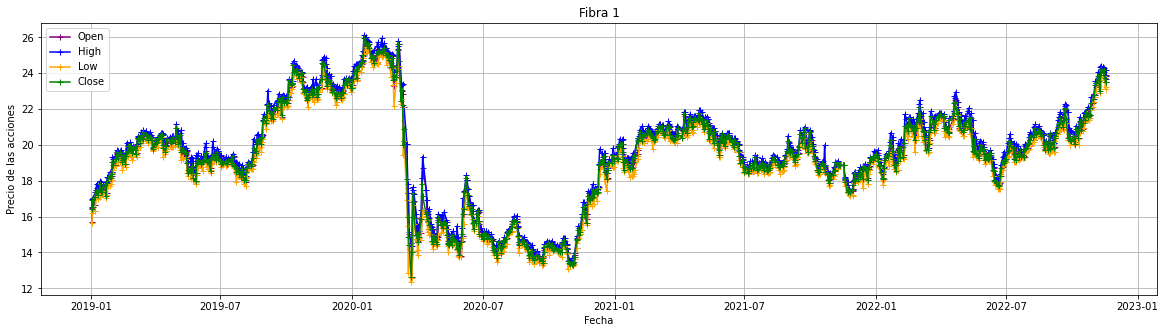

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(FunoHist['Open'], color='purple', marker='+', label='Open')
plt.plot(FunoHist['High'], color='blue', marker='+', label='High')
plt.plot(FunoHist['Low'], color='orange', marker='+', label='Low')
plt.plot(FunoHist['Close'], color='green', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Fibra 1')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
#Para el primer modelo
MDatos1 = FunoHist.drop(columns = ['Volume', 'Dividends', 'Stock Splits'])
MDatos1

,Open,High,Low,Close
Date,,,,
2019-01-02 00:00:00-06:00,15.692252,16.555181,15.626989,16.439157
2019-01-03 00:00:00-06:00,16.460913,16.968517,16.214362,16.903254
2019-01-04 00:00:00-06:00,16.939510,17.026527,16.323132,16.547928
2019-01-07 00:00:00-06:00,16.656703,17.352848,16.323134,17.120800
2019-01-08 00:00:00-06:00,17.193318,17.476128,17.019282,17.360104
...,...,...,...,...
2022-11-14 00:00:00-06:00,24.340000,24.340000,23.850000,24.000000
2022-11-15 00:00:00-06:00,24.059999,24.299999,23.870001,24.150000
2022-11-16 00:00:00-06:00,24.180000,24.200001,23.510000,23.740000


In [9]:
#Para el segundo modelo
MDatos2 = FunoHist.drop(columns = ['Dividends', 'Stock Splits'])
MDatos2

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02 00:00:00-06:00,15.692252,16.555181,15.626989,16.439157,1928502
2019-01-03 00:00:00-06:00,16.460913,16.968517,16.214362,16.903254,2436398
2019-01-04 00:00:00-06:00,16.939510,17.026527,16.323132,16.547928,4363680
2019-01-07 00:00:00-06:00,16.656703,17.352848,16.323134,17.120800,8307194
2019-01-08 00:00:00-06:00,17.193318,17.476128,17.019282,17.360104,3749804
...,...,...,...,...,...
2022-11-14 00:00:00-06:00,24.340000,24.340000,23.850000,24.000000,6055649
2022-11-15 00:00:00-06:00,24.059999,24.299999,23.870001,24.150000,4031749
2022-11-16 00:00:00-06:00,24.180000,24.200001,23.510000,23.740000,5932576


In [10]:
# En caso de tener valores nulos
MDatos1 = MDatos1.dropna()
MDatos1

#Se repite para modelo 2
MDatos2 = MDatos2.dropna()
MDatos2

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02 00:00:00-06:00,15.692252,16.555181,15.626989,16.439157,1928502
2019-01-03 00:00:00-06:00,16.460913,16.968517,16.214362,16.903254,2436398
2019-01-04 00:00:00-06:00,16.939510,17.026527,16.323132,16.547928,4363680
2019-01-07 00:00:00-06:00,16.656703,17.352848,16.323134,17.120800,8307194
2019-01-08 00:00:00-06:00,17.193318,17.476128,17.019282,17.360104,3749804
...,...,...,...,...,...
2022-11-14 00:00:00-06:00,24.340000,24.340000,23.850000,24.000000,6055649
2022-11-15 00:00:00-06:00,24.059999,24.299999,23.870001,24.150000,4031749
2022-11-16 00:00:00-06:00,24.180000,24.200001,23.510000,23.740000,5932576


### Aplicación del algoritmo

In [11]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import model_selection

Se seleccionan las variables predictoras (X) y la variable a pronosticar (Y)

In [12]:
#Modelo 1
X1 = np.array(MDatos1[['Open',
                     'High',
                     'Low']])
pd.DataFrame(X1)

,0,1,2
0,15.692252,16.555181,15.626989
1,16.460913,16.968517,16.214362
2,16.939510,17.026527,16.323132
3,16.656703,17.352848,16.323134
4,17.193318,17.476128,17.019282
...,...,...,...
975,24.340000,24.340000,23.850000
976,24.059999,24.299999,23.870001
977,24.180000,24.200001,23.510000
978,23.879999,24.160000,23.120001


In [13]:
Y1 = np.array(MDatos1[['Close']])
pd.DataFrame(Y1)

,0
0,16.439157
1,16.903254
2,16.547928
3,17.120800
4,17.360104
...,...
975,24.000000
976,24.150000
977,23.740000
978,23.490000


In [14]:
#Modelo 2
X2 = np.array(MDatos2[['Open',
                     'High',
                     'Low', 'Volume']])
pd.DataFrame(X2)

Y2 = np.array(MDatos2[['Close']])
pd.DataFrame(Y2)

,0
0,16.439157
1,16.903254
2,16.547928
3,17.120800
4,17.360104
...,...
975,24.000000
976,24.150000
977,23.740000
978,23.490000


Se hace la división de los datos

In [15]:
#Modelo 1
X1_train, X1_test, Y1_train, Y1_test = model_selection.train_test_split(X1, Y1, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

#Modelo 2
X2_train, X2_test, Y2_train, Y2_test = model_selection.train_test_split(X2, Y2, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

In [16]:
pd.DataFrame(X1_test)

,0,1,2
0,14.542475,14.550790,14.268089
1,14.459328,14.608994,14.276405
2,14.836788,15.957612,14.723900
3,19.216500,19.329845,18.902618
4,21.588539,21.588539,21.218695
...,...,...,...
191,19.850785,20.147287,19.695121
192,18.745679,19.242657,18.649770
193,18.752421,19.323851,18.580991
194,21.548630,21.790749,21.530006


In [17]:
pd.DataFrame(X2_test)

,0,1,2,3
0,14.542475,14.550790,14.268089,3188251.0
1,14.459328,14.608994,14.276405,12275204.0
2,14.836788,15.957612,14.723900,6562785.0
3,19.216500,19.329845,18.902618,14296475.0
4,21.588539,21.588539,21.218695,6863774.0
...,...,...,...,...
191,19.850785,20.147287,19.695121,5967546.0
192,18.745679,19.242657,18.649770,22629850.0
193,18.752421,19.323851,18.580991,6644684.0
194,21.548630,21.790749,21.530006,12860464.0


Se entrena el modelo a través de Regresión Lineal Múltiple

In [18]:
#Modelo1
RLMultiple1 = linear_model.LinearRegression()
RLMultiple1.fit(X1_train, Y1_train)

#Modelo2
RLMultiple2 = linear_model.LinearRegression()
RLMultiple2.fit(X2_train, Y2_train)

LinearRegression()

In [19]:
#Se genera el pronóstico 1
Y1_Pronostico = RLMultiple1.predict(X1_test)
pd.DataFrame(Y1_Pronostico)

,0
0,14.373260
1,14.453006
2,15.562068
3,19.090458
4,21.342260
...,...
191,19.962788
192,19.040944
193,19.047742
194,21.716096


In [20]:
#Se genera el pronóstico 2
Y2_Pronostico = RLMultiple2.predict(X2_test)
pd.DataFrame(Y2_Pronostico)

,0
0,14.367572
1,14.458538
2,15.553371
3,19.100444
4,21.344179
...,...
191,19.961534
192,19.059769
193,19.044752
194,21.725672


In [23]:
r2_score(Y1_test, Y1_Pronostico)

0.996402781589011

In [24]:
r2_score(Y2_test, Y2_Pronostico)

0.9963749475604303

In [26]:
print('== Modelo 1 ==')
print('Coeficientes: \n', RLMultiple1.coef_)
print('Intercepto: \n', RLMultiple1.intercept_)
print("Residuo: %.4f" % mean_absolute_error(Y1_test, Y1_Pronostico))
print("MSE: %.4f" % mean_squared_error(Y1_test, Y1_Pronostico))
print("RMSE: %.4f" % mean_squared_error(Y1_test, Y1_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score (Bondad de ajuste): %.4f' % r2_score(Y1_test, Y1_Pronostico))

print('== Modelo 2 ==')
print('Coeficientes: \n', RLMultiple2.coef_)
print('Intercepto: \n', RLMultiple2.intercept_)
print("Residuo: %.4f" % mean_absolute_error(Y2_test, Y2_Pronostico))
print("MSE: %.4f" % mean_squared_error(Y2_test, Y2_Pronostico))
print("RMSE: %.4f" % mean_squared_error(Y2_test, Y2_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score (Bondad de ajuste): %.4f' % r2_score(Y2_test, Y2_Pronostico))

== Modelo 1 ==
Coeficientes: 
 [[-0.39723411  0.70364289  0.69287112]]
Intercepto: 
 [0.02552093]
Residuo: 0.1311
MSE: 0.0293
RMSE: 0.1712
Score (Bondad de ajuste): 0.9964
== Modelo 2 ==
Coeficientes: 
 [[-3.93978768e-01  6.96173380e-01  6.97536945e-01  1.30814748e-09]]
Intercepto: 
 [0.01043642]
Residuo: 0.1317
MSE: 0.0295
RMSE: 0.1718
Score (Bondad de ajuste): 0.9964


#### **Conformación del modelo de pronóstico**

Y1 = 0.0255 - 0.3972(Open) + 0.7036(High) + 0.6928(Low) + 0.1311

Y2 = 0.0104 - 0.3939(Open) + 0.6961(High) + 0.6975(Low) + 0.1308(Volume) + 0.1317

* Se tiene un Score de 0.9989, que indica que el pronóstico del precio de cierre de la acción se logrará con un 99.8% de efectividad.
* Además, los pronósticos del modelo final se alejan en promedio 1.171 y 1.082 unidades del valor real, esto es, MSE y RMSE, respectivamente.

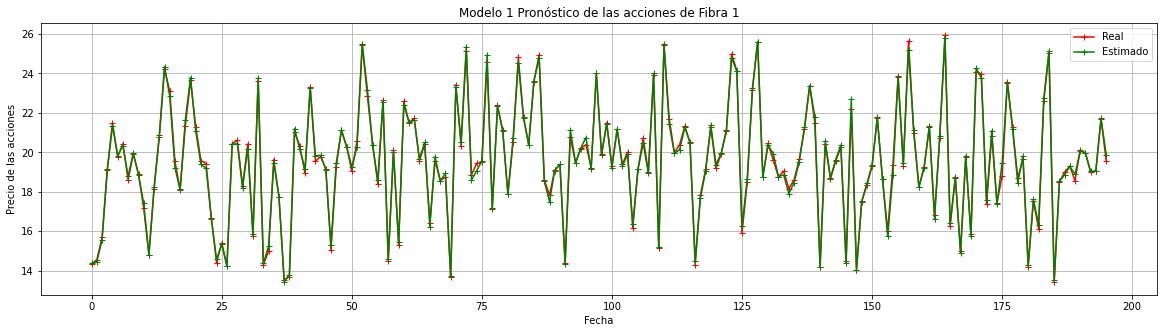

In [27]:
plt.figure(figsize=(20, 5))
plt.plot(Y1_test, color='red', marker='+', label='Real')
plt.plot(Y1_Pronostico, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Modelo 1 Pronóstico de las acciones de Fibra 1')
plt.grid(True)
plt.legend()
plt.show()

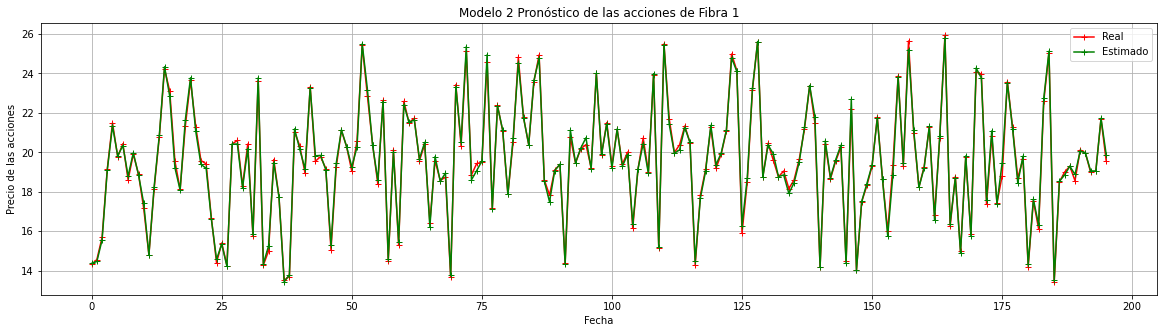

In [28]:
plt.figure(figsize=(20, 5))
plt.plot(Y2_test, color='red', marker='+', label='Real')
plt.plot(Y2_Pronostico, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Modelo 2 Pronóstico de las acciones de Fibra 1')
plt.grid(True)
plt.legend()
plt.show()

#### **Nuevos pronósticos**

In [29]:
#Mover los datos segun el pronostico actual de la accion
PrecioAccion1 = pd.DataFrame({'Open': [100.2],
                             'High': [122.2], 
                             'Low': [110.8]})
RLMultiple1.predict(PrecioAccion1)

array([[122.97794452]])

In [30]:
#Mover los datos segun el pronostico actual de la accion
PrecioAccion2 = pd.DataFrame({'Open': [100.2],
                             'High': [122.2], 
                             'Low': [110.8],
                            'Volumen':[120.4]})
RLMultiple2.predict(PrecioAccion2)

array([[122.89324452]])

Proyecto: Consumir el objeto que ya tiene la ecuacion para predecir el comportamiento de acciones
nuevos pronosticosdos interface
1. para configurar el algoritmo, opciones avanzadas, definir datos y elegir variables
2. Usuario final que solo consuma el objeto